In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Obtención de datos

In [2]:
url = "https://raw.githubusercontent.com/daramireh/simonBolivarCienciaDatos/refs/heads/main/Student_Performance.csv"

df_math = pd.read_csv(url)

 a. Visualizaciones de datos: es importante que usted haga una descripción de los hallazgos

In [22]:
df_math.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


 b. Identifique las variables, tipo de dato y elabore un diccionario de datos con estas variables (puede hacerlo en Excel conectándose
directamente al Raw).

In [3]:
# Crear un diccionario con información de las variables
diccionario_datos = pd.DataFrame({
    "Variable": df_math.columns,
    "Tipo de Dato": df_math.dtypes.astype(str),
    "Descripción": ["Horas de estudio empleadas por estudiante", "Puntaje obtenido en evaluaciones previas", "Indica si el estudiante participa en actividades extracurriculares","Cantidad de horas que duerme el estudiante","Cantidad de simulacros que el estudiante realiza antes de la evaluación","Desempeño del estudiante en el examen"]
})

# Mostrar el diccionario de datos
print(diccionario_datos)

                                                          Variable  \
Hours Studied                                        Hours Studied   
Previous Scores                                    Previous Scores   
Extracurricular Activities              Extracurricular Activities   
Sleep Hours                                            Sleep Hours   
Sample Question Papers Practiced  Sample Question Papers Practiced   
Performance Index                                Performance Index   

                                 Tipo de Dato  \
Hours Studied                           int64   
Previous Scores                         int64   
Extracurricular Activities             object   
Sleep Hours                             int64   
Sample Question Papers Practiced        int64   
Performance Index                     float64   

                                                                        Descripción  
Hours Studied                             Horas de estudio empleadas por estudi

c. ¿Es necesario transformar los datos para mejor entendimiento de los mismos? Si su respuesta es positiva, ¿qué tipo de transformaciones
haría? Si considera necesario, realice las transformaciones para desarrollar los puntos 2 y 3

In [4]:
#Convertir la variable Extracurricular Activities a una variable booleana (la ventaja de esta forma es que ocupa menos espacio en memoria y el procesamiento es más rápido)

df_math["Extracurricular Activities"] = df_math["Extracurricular Activities"].map({"Yes": True, "No": False})
df_math["Extracurricular Activities"] = df_math["Extracurricular Activities"].astype(bool)

print(df_math.dtypes)

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities             bool
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


2. Como resultado del análisis de las estructuras de datos del punto anterior, elabore un análisis exploratorio donde identifique:

Estadística descriptiva de las variables. Haga una descripción de los hallazgos.

In [5]:
df_math.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


b. ¿Existen diferencias estadísticas entre el puntaje final (Performance Index) y la asistencia a actividades extracurriculares? En la
resolución se debe poder observar todo el proceso realizado para la respuesta

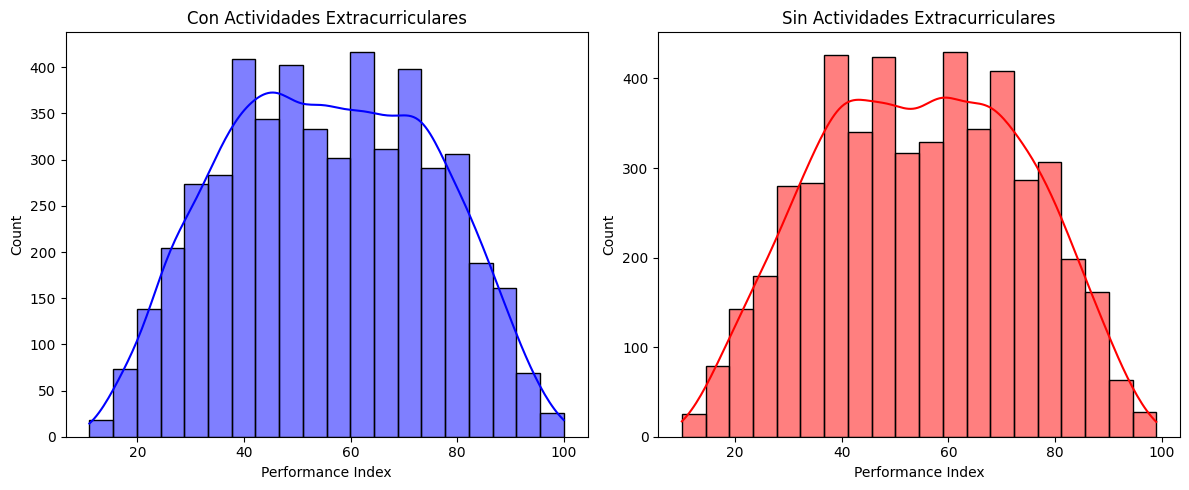

Prueba usada: Prueba de Mann-Whitney U
Estadístico: 12814910.5000
P-valor: 0.0284
Conclusión: Existen diferencias estadísticas significativas entre los grupos.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5052.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
grupo_si = df_math[df_math["Extracurricular Activities"] == True]["Performance Index"]
grupo_no = df_math[df_math["Extracurricular Activities"] == False]["Performance Index"]

# Visualizar la distribución con histogramas
plt.figure(figsize=(12, 5))

# Histograma para estudiantes con actividades extracurriculares
plt.subplot(1, 2, 1)
sns.histplot(grupo_si, color="blue", kde=True, bins=20)
plt.title("Con Actividades Extracurriculares")

# Histograma para estudiantes sin actividades extracurriculares
plt.subplot(1, 2, 2)
sns.histplot(grupo_no, color="red", kde=True, bins=20)
plt.title("Sin Actividades Extracurriculares")

plt.tight_layout()
plt.show()

# Prueba de normalidad (Shapiro-Wilk)
normal_si = stats.shapiro(grupo_si.dropna())
normal_no = stats.shapiro(grupo_no.dropna())

# Determinar qué prueba aplicar
if normal_si.pvalue > 0.05 and normal_no.pvalue > 0.05:
    # Prueba t de Student
    test_result = stats.ttest_ind(grupo_si, grupo_no, nan_policy='omit')
    prueba_usada = "Prueba t de Student"
else:
    # Prueba de Mann-Whitney U
    test_result = stats.mannwhitneyu(grupo_si, grupo_no, alternative='two-sided')
    prueba_usada = "Prueba de Mann-Whitney U"

# Mostrar resultados
print(f"Prueba usada: {prueba_usada}")
print(f"Estadístico: {test_result.statistic:.4f}")
print(f"P-valor: {test_result.pvalue:.4f}")

# Interpretación del p-valor
if test_result.pvalue < 0.05:
    print("Conclusión: Existen diferencias estadísticas significativas entre los grupos.")
else:
    print("Conclusión: No hay diferencias estadísticas significativas entre los grupos.")

 c. ¿Existe relación entre las horas de estudio (Hours Studied) y la resolución de las actividades propuestas en el material de estudio
(Sample Question Papers Practiced)? En la resolución se debe poder observar todo el proceso realizado para la respuesta.

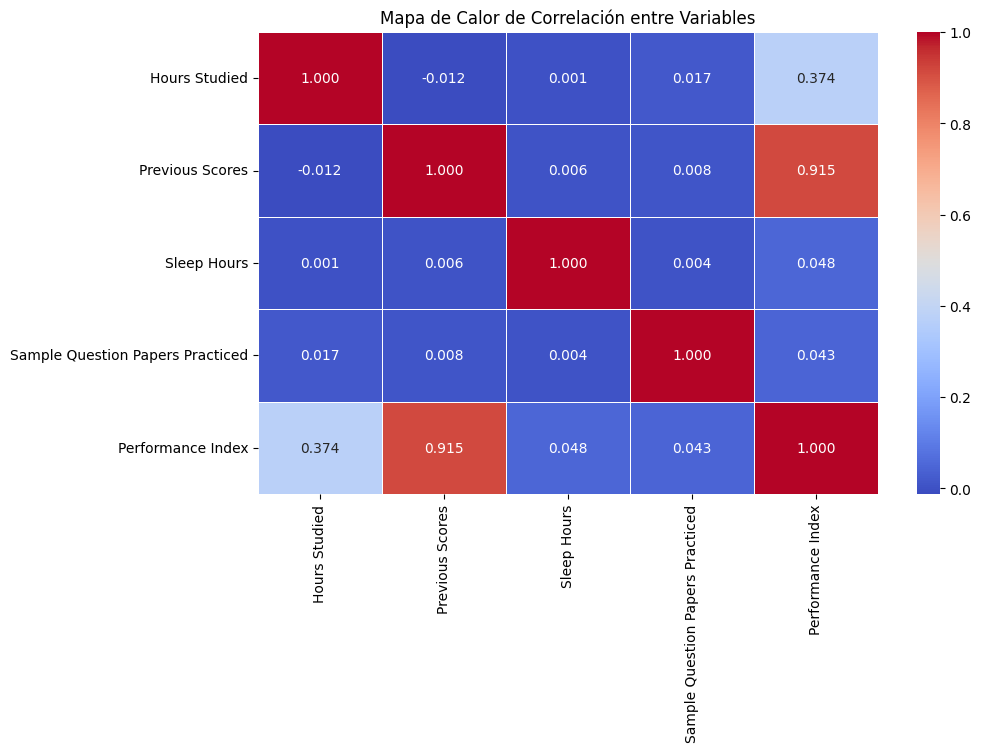

In [7]:
# Seleccionar solo variables numéricas
df_math_numeric = df_math.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = df_math_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación entre Variables")
plt.show()

De acuerdo al heatmap las variables (Hours Studied) y (Sample Question Papers Practiced) tienen poca relación

d. Identifique los grupos o conglomerados de estudiantes según sus características y aplique el análisis descriptivo a cada clúster.

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_math_numeric)

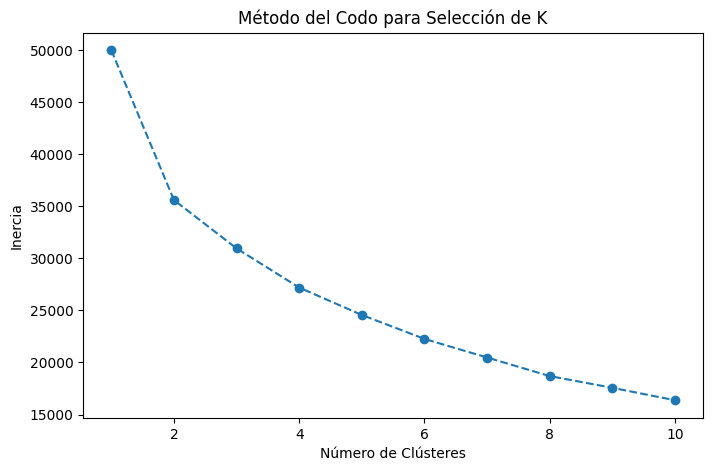

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Método del Codo
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la curva del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para Selección de K')
plt.show()

In [10]:
# Aplicar K-Means con el número óptimo de clusters (ejemplo con K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_math['Cluster'] = kmeans.fit_predict(df_scaled)

# Convertir Cluster a categoría
df_math['Cluster'] = df_math['Cluster'].astype('category')

# Ver la cantidad de elementos en cada clúster
print(df_math['Cluster'].value_counts())

Cluster
1    4232
0    2996
2    2772
Name: count, dtype: int64


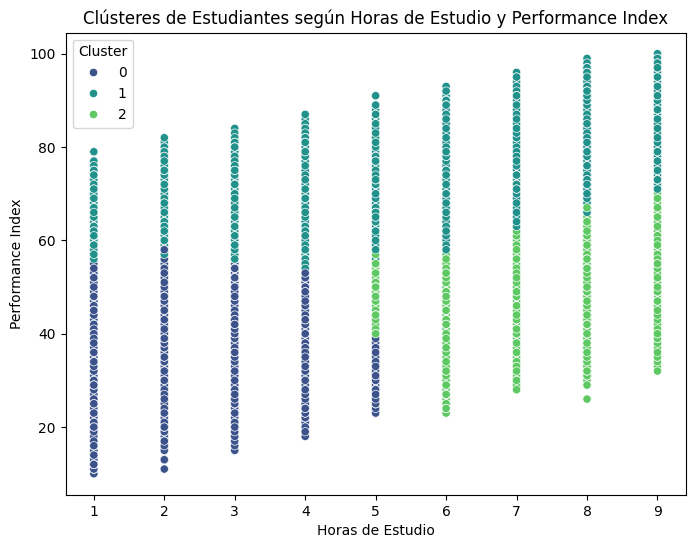

In [11]:
# Visualización de Clústeres según Horas de Estudio y Performance Index
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_math['Hours Studied'], y=df_math['Performance Index'], hue=df_math['Cluster'], palette='viridis')
plt.title('Clústeres de Estudiantes según Horas de Estudio y Performance Index')
plt.xlabel('Horas de Estudio')
plt.ylabel('Performance Index')
plt.show()

In [12]:
# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convertir a DataFrame
df = df_math.copy()
df['Cluster'] = df_math['Cluster']
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

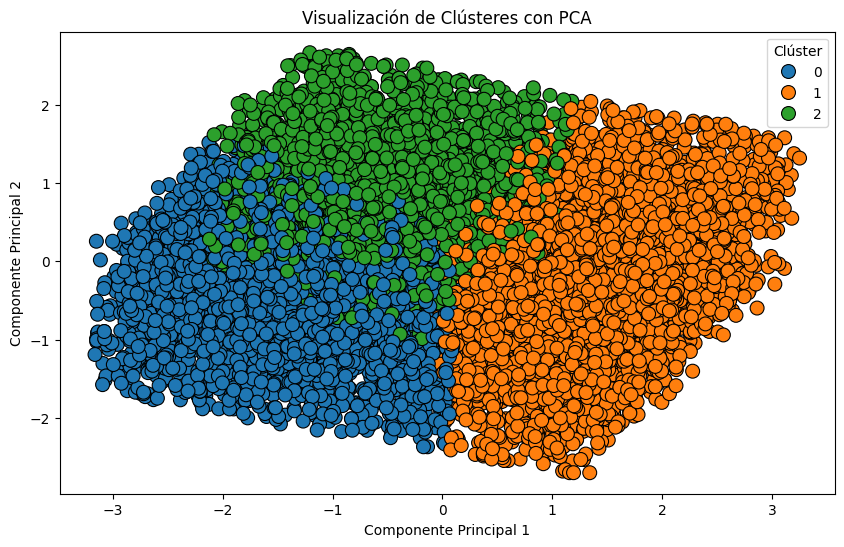

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='tab10', s=100, edgecolor='black')

# Agregar etiquetas y título
plt.title('Visualización de Clústeres con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

In [14]:
# Análisis descriptivo por clúster
cluster_desc = df.groupby('Cluster').describe()
cluster_desc

<ipython-input-14-c2cc088d7f3e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_desc = df.groupby('Cluster').describe()


Hours Studied                                               \
                count      mean       std  min  25%  50%  75%  max   
Cluster                                                              
0              2996.0  2.600467  1.296812  1.0  1.0  2.0  4.0  5.0   
1              4232.0  5.214319  2.468359  1.0  3.0  5.0  7.0  9.0   
2              2772.0  7.240620  1.324683  5.0  6.0  7.0  8.0  9.0   

        Previous Scores             ...      PCA1              PCA2            \
                  count       mean  ...       75%       max   count      mean   
Cluster                             ...                                         
0                2996.0  57.285047  ... -0.741306  0.144372  2996.0 -0.472040   
1                4232.0  86.583648  ...  1.865057  3.250556  4232.0 -0.251976   
2                2772.0  56.424603  ...  0.012946  1.178088  2772.0  0.894875   

                                                                     
              std       min       25%       50%       75%       max  
Cluster                                                              
0        0.761737 -2.364383 -1.053318 -0.466047  0.082734  1.514645  
1        0.949884 -2.695385 -0.923666 -0.243912  0.450888  2.039874  
2        0.728556 -1.005849  0.373420  0.904896  1.426928  2.661247  

[3 rows x 56 columns]

### Visualización de Distribuciones

<ipython-input-15-6ca8d365e2c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['Performance Index'], palette="Set2")


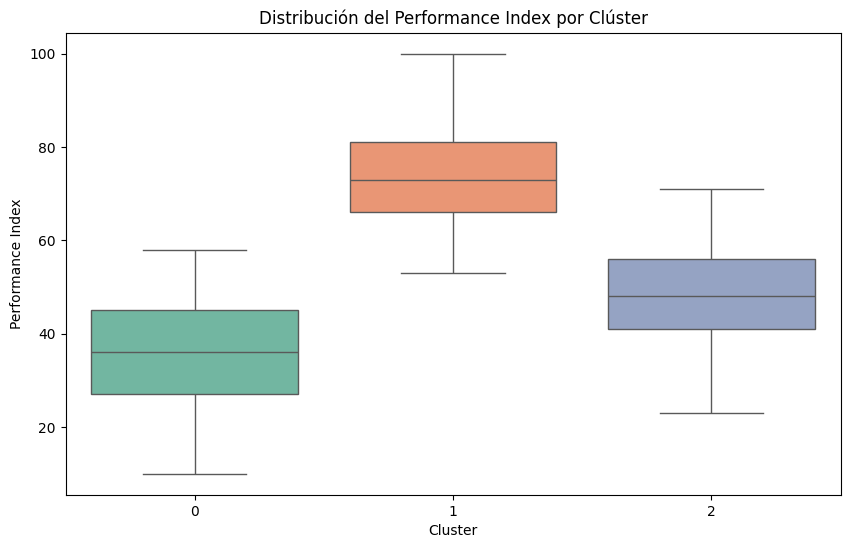

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cluster'], y=df['Performance Index'], palette="Set2")
plt.title("Distribución del Performance Index por Clúster")
plt.show()

<ipython-input-16-306a549127cc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Performance Index'], label=f'Clúster {cluster}', shade=True)
<ipython-input-16-306a549127cc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Performance Index'], label=f'Clúster {cluster}', shade=True)
<ipython-input-16-306a549127cc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Performance Index'], label=f'Clúster {cluster}', shade=True)


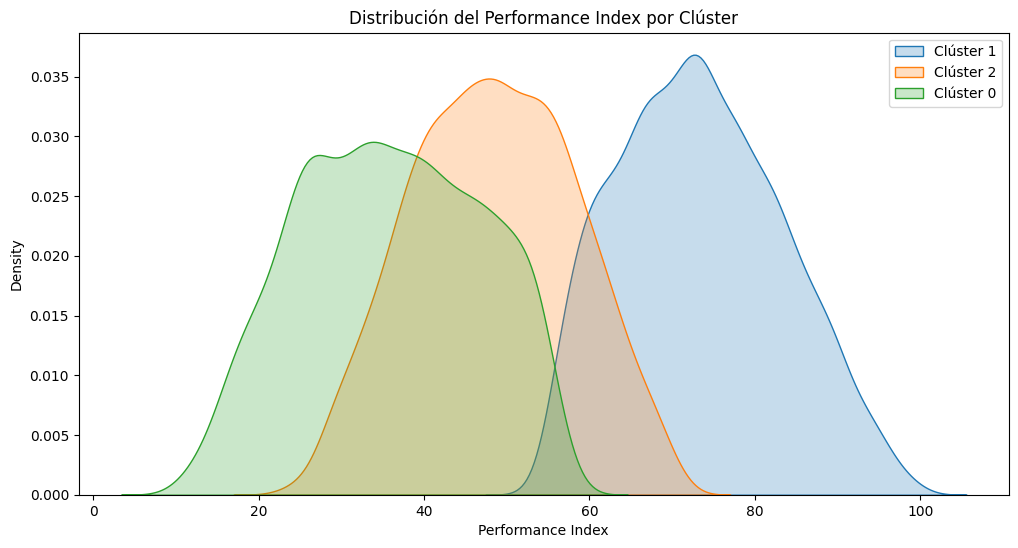

In [16]:
plt.figure(figsize=(12, 6))
for cluster in df['Cluster'].unique():
    subset = df_math[df['Cluster'] == cluster]
    sns.kdeplot(subset['Performance Index'], label=f'Clúster {cluster}', shade=True)

plt.title("Distribución del Performance Index por Clúster")
plt.xlabel("Performance Index")
plt.legend()
plt.show()

 3. Elabore una regresión lineal que permita predecir el puntaje final (Performance Index) y responda:

 a. ¿Cuáles son las variables que explican el comportamiento el desempeño final en matemáticas?

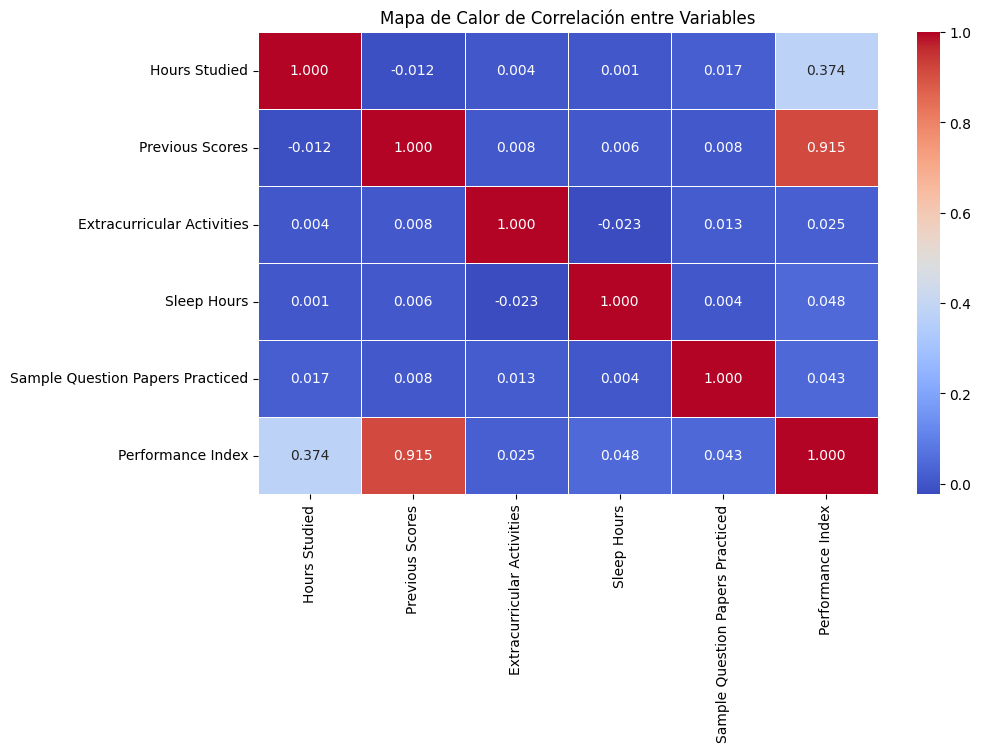

In [17]:
# Seleccionar solo variables numéricas
df_math_numeric = df.select_dtypes(include=['number'])
df_math_numeric = df.drop(columns=["PCA1", "PCA2"])
df_math_numeric = df_math_numeric.drop(columns=["Cluster"])
# Calcular la matriz de correlación
correlation_matrix = df_math_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación entre Variables")
plt.show()

## Las variables que explican el comportamiento de desempeño final son Previous Scores (0.915) y Hours Studied en menor proporción (0.374)

b. Haga validación del modelo a partir de las métricas de desempeño.

Evaluación del Modelo:
MAE: 1.6111
RMSE: 2.0206
R²: 0.9890


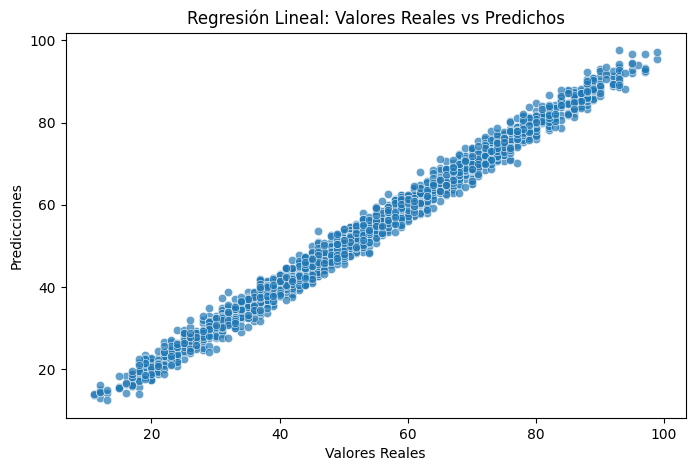

In [18]:
df = df_math.dropna()
df = df.drop(columns=["Cluster"])

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.95)  # Mantener 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Metricas de desempeño
print(f"Evaluación del Modelo:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Visualización de resultados
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs Predichos")
plt.show()

 c. Defina una métrica de desempeño como “métrica de negocio” o de interés y justifique porqué esa métrica es la ideal para definir el
rendimiento del modelo de acuerdo con el caso de negocio.

Para evaluar el rendimiento del modelo de Regresión Lineal, Utilizo el coeficiente R2 como métrica principal. Esta métrica mide qué tan bien el modelo explica la variabilidad de la variable dependiente (Performance Index) en función de las variables independientes.

d. ¿Es la regresión el método adecuado para predecir el desempeño?

Las relaciones entre las variables predictoras y el Performance Index son lineales, entonces la Regresión Lineal es un método adecuado para predecir el desempeño de los estudiantes.

Sin embargo, es importante asegurarnos de que la regresión cumpla con las suposiciones clave y que no haya problemas como colinealidad o datos atípicos que afecten la precisión del modelo.

 e. Bonus track: Si dispone del tiempo, elabore diferentes modelos predictivos, pueden ser métodos estadísticos o Machine Learning. Debe
comparar los resultados con el modelo entrenado en el punto 3.

## Árbol de decisión

Evaluación del Modelo (Árbol de Decisión):
MAE: 2.9313
RMSE: 3.6038
R²: 0.9650


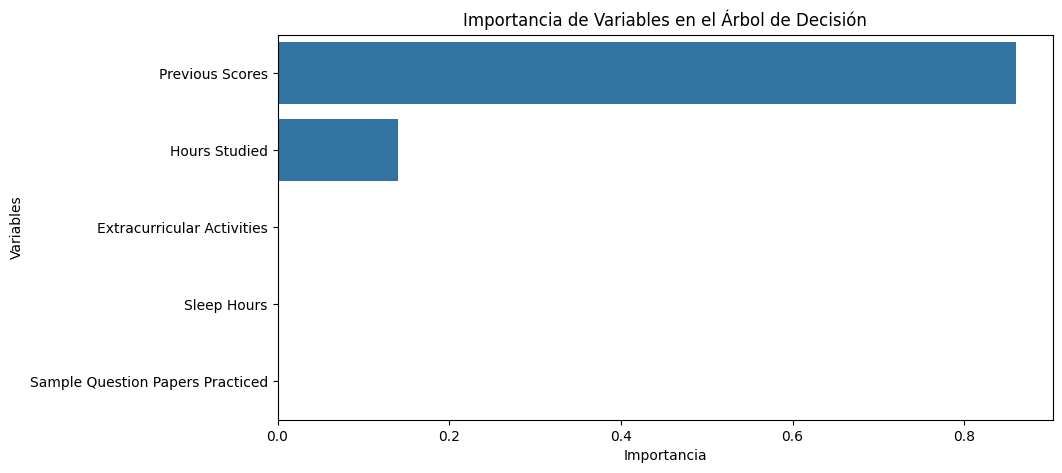

In [19]:
# Preprocesamiento de datos
df = df_math.dropna()  # Eliminar valores nulos
df = df.drop(columns=["Cluster"])

X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar Árbol de Decisión
modelo = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

#  Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Métricas
print(f"Evaluación del Modelo (Árbol de Decisión):")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Importancia de las variables
feature_importance = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualización de Importancia de Variables
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Importancia de Variables en el Árbol de Decisión")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()

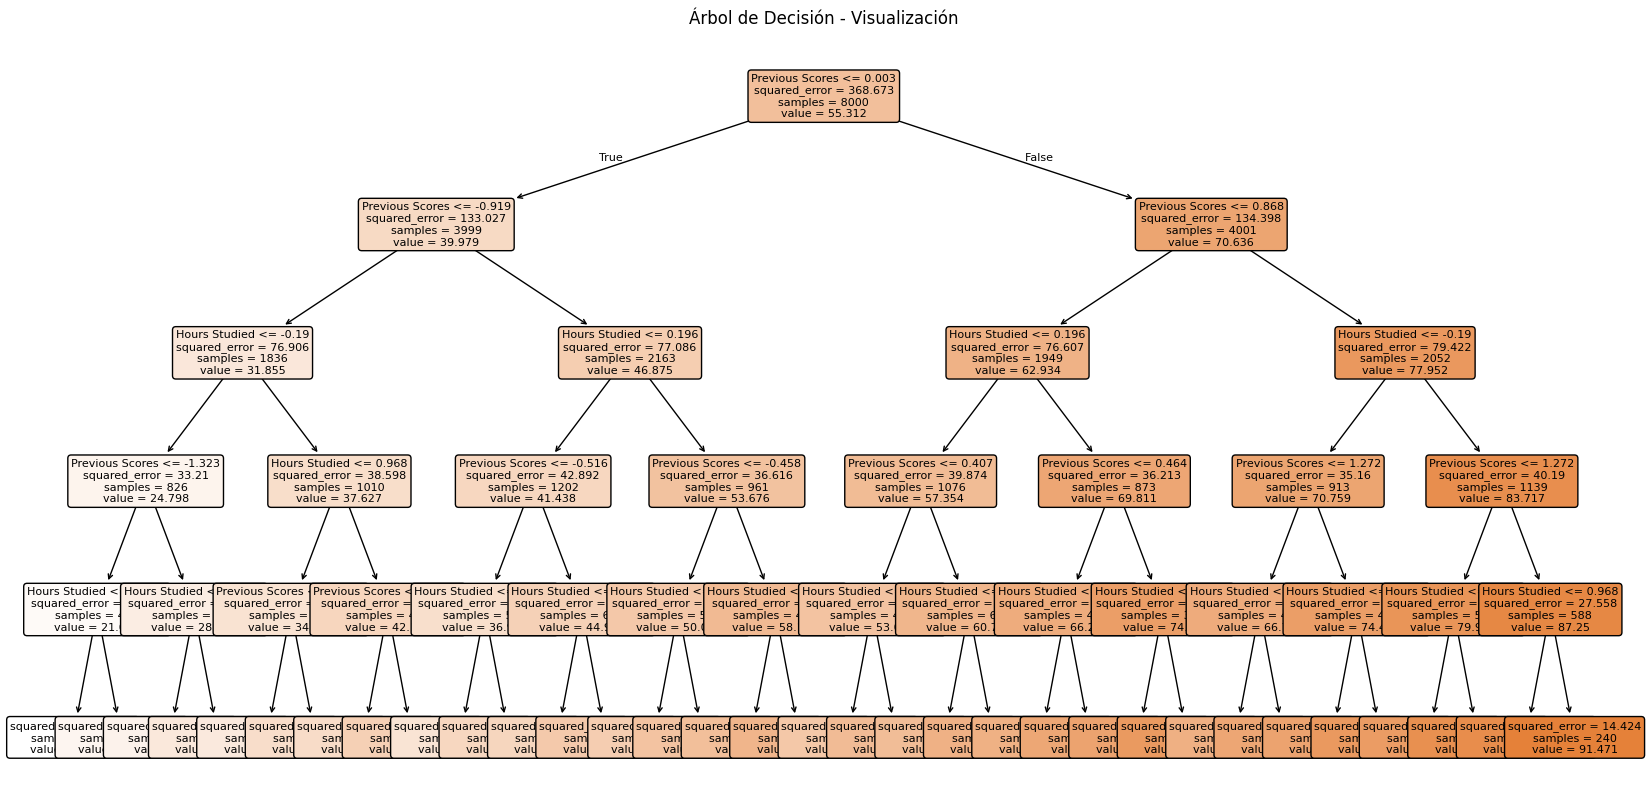

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.title("Árbol de Decisión - Visualización")
plt.show()

El modelo de regresión lineal es claramente superior en términos de precisión y capacidad predictiva, ya que tiene menores errores (MAE y RMSE) y explica mejor la variabilidad de los datos (R² más alto).

El árbol de decisión podría ser útil si los datos presentan relaciones no lineales o interacciones complejas, pero en este caso, la regresión lineal parece ser la mejor opción.